In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_examples = pd.read_csv("../code/train_images_split-0.3_drop-0.0.csv")

In [3]:
train_examples.head()

,Unnamed: 0,product_id,category_idx,img_idx
0,0,40751,619,0
1,1,68402,619,0
2,2,71452,619,0
3,3,71452,619,1
4,4,80137,619,0


In [4]:
categories_df = pd.read_csv("categories.csv", index_col="category_id")

def make_category_tables():
    # Create dictionaries for quick lookup of `category_id` to
    # `category_idx` mapping.
    cat2idx = {}
    idx2cat = {}
    for ir in categories_df.itertuples():
        category_id = ir[0]
        category_idx = ir[4]
        cat2idx[category_id] = category_idx
        idx2cat[category_idx] = category_id
    return cat2idx, idx2cat


cat2idx, idx2cat = make_category_tables()

In [5]:
train_examples["category_id"] = train_examples["category_idx"].apply(lambda i : idx2cat[i])

In [6]:
train_examples.head()

,Unnamed: 0,product_id,category_idx,img_idx,category_id
0,0,40751,619,0,1000005633
1,1,68402,619,0,1000005633
2,2,71452,619,0,1000005633
3,3,71452,619,1,1000005633
4,4,80137,619,0,1000005633


In [7]:
category_data = pd.read_csv("../data/category_names.csv")

In [8]:
category_data[category_data.category_id == idx2cat[619]]

,category_id,category_level1,category_level2,category_level3
619,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS


In [9]:
train_cat = train_examples.merge(right=category_data, on="category_id", how="left")

In [10]:
# train_cat[:100000].to_csv("train_cat.csv",index=False)

In [11]:
train_cat.head()

,Unnamed: 0,product_id,category_idx,img_idx,category_id,category_level1,category_level2,category_level3
0,0,40751,619,0,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS
1,1,68402,619,0,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS
2,2,71452,619,0,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS
3,3,71452,619,1,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS
4,4,80137,619,0,1000005633,AUTO - MOTO,OUTILLAGE,DOUILLES - EMBOUTS


In [12]:
lvl1 = pd.pivot_table(train_cat, index=['category_level1'], values='product_id',aggfunc=len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6be35ecf8>]], dtype=object)

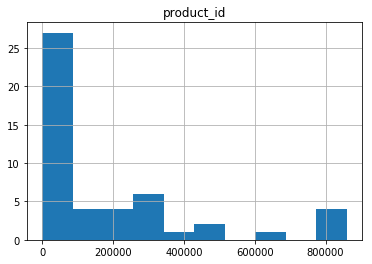

In [13]:
lvl1.hist()

In [14]:
lvl1['relative_perc'] = lvl1/lvl1.sum()

In [15]:
lvl1 = lvl1.sort_values(by='product_id', ascending=False)

In [16]:
lvl1['cumu_perc'] = lvl1['relative_perc'].cumsum()

In [17]:
lvl1

,product_id,relative_perc,cumu_perc
category_level1,,,
TELEPHONIE - GPS,859339,0.099166,0.099166
AUTO - MOTO,836122,0.096486,0.195652
INFORMATIQUE,787149,0.090835,0.286487
DECO - LINGE - LUMINAIRE,777830,0.089760,0.376247
LIBRAIRIE,604757,0.069788,0.446035
BIJOUX - LUNETTES - MONTRES,481750,0.055593,0.501627
BRICOLAGE - OUTILLAGE - QUINCAILLERIE,434910,0.050188,0.551815
JEUX - JOUETS,385787,0.044519,0.596334
SPORT,305012,0.035198,0.631531


In [18]:
taboo_lvl1 = lvl1[lvl1['cumu_perc'] > 0.9].index.tolist()

In [19]:
categories_df.head()

,category_level1,category_level2,category_level3,category_idx
category_id,,,,
1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA,0
1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR,1
1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO,2
1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU,3
1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR,4


In [20]:
categories_df[categories_df.category_level1.isin(taboo_lvl1)]

,category_level1,category_level2,category_level3,category_idx
category_id,,,,
1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA,0
1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR,1
1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO,2
1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU,3
1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR,4
1000012738,AMENAGEMENT URBAIN - VOIRIE,SIGNALISATION ROUTIERE,CONE DE SIGNALISATION - PLOT DE SIGNALISATION,5
1000012732,AMENAGEMENT URBAIN - VOIRIE,SIGNALISATION ROUTIERE,PANNEAU ROUTIER,6
1000013163,AMENAGEMENT URBAIN - VOIRIE,SIGNALISATION ROUTIERE,RUBAN DE SIGNALISATION,7
1000012712,AMENAGEMENT URBAIN - VOIRIE,VOIRIE,BLOC PARKING - ARCEAU PARKING,8


In [21]:
taboo_category_id = categories_df[categories_df.category_level1.isin(taboo_lvl1)].index.tolist()

In [26]:
import pickle
with open("taboo_category_id.pickle", "wb") as f:
    pickle.dump(taboo_category_id, f)

In [32]:
test = [5]
for i in range(1, 10):
    print(i)
    if test and i in test:
        continue
    print("fin")

1
fin
2
fin
3
fin
4
fin
5
6
fin
7
fin
8
fin
9
fin
